## Easy

In [10]:
import numpy as np
import pandas as pd
import re
from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [11]:
df = pd.read_csv('./out.csv')
df

,Section Name,Headline
0,Style,In Watches: Minutes of Steel
1,Opinion,Americans and Their Flag
2,N.Y. / Region,Mugged With a Blow Dryer
3,Sports,Pop Warner Concussions Suit
4,Movies,"This Week’s Movies | Sept. 02, 2016"
...,...,...
649881,Movies,Lin-Manuel Miranda: ‘Savor Nights Like This’
649882,N.Y. / Region,"After a Devastating Fire, ‘the Black Lumberjac..."
649883,Sports,"For Mets’ Infield, Chiropractor May Be the Mos..."
649884,Movies,On the Red Carpet With ‘Hidden Figures’ Producers


In [12]:
df.dropna(inplace = True)

In [13]:
uniq_cols = set(df['Section Name'].tolist())

In [14]:
classes = dict()
cols = list(uniq_cols)
for i, elem in enumerate(cols):
    classes[elem] = i
classes

{'NYT Now': 0,
 'N.Y. / Region': 1,
 'Science': 2,
 'International Home': 3,
 'Opinion': 4,
 'Technology': 5,
 'Style': 6,
 'Your Money': 7,
 'Books': 8,
 'Watching': 9,
 'Food': 10,
 'Education': 11,
 'Times Insider': 12,
 'Health': 13,
 'Sports': 14,
 'Open': 15,
 'Job Market': 16,
 'Multimedia/Photos': 17,
 'Multimedia': 18,
 'U.S.': 19,
 'Briefing': 20,
 'Corrections': 21,
 'Well': 22,
 'Real Estate': 23,
 'The Upshot': 24,
 'Movies': 25,
 'Public Editor': 26,
 'Automobiles': 27,
 'Business Day': 28,
 'World': 29,
 'T Magazine': 30,
 'Travel': 31,
 'Today’s Paper': 32,
 'Theater': 33,
 'Magazine': 34,
 'Obituaries': 35,
 'Podcasts': 36,
 'Afternoon Update': 37,
 'Giving': 38,
 'Fashion & Style': 39,
 'The Learning Network': 40,
 'Universal': 41,
 'Homepage': 42,
 'Arts': 43,
 'Admin': 44,
 'Sunday Review': 45,
 'Blogs': 46,
 'Crosswords & Games': 47}

Посмотрим на сбалансированность классов

In [15]:
balance = []
for col in cols:
    balance.append(df[df['Section Name'] == col].shape[0])
balance

[926,
 37010,
 9016,
 61,
 70358,
 12872,
 3542,
 3883,
 19547,
 2140,
 13490,
 1905,
 5084,
 4268,
 48538,
 20,
 1051,
 2471,
 652,
 72804,
 9165,
 3813,
 7658,
 12247,
 7359,
 18117,
 1071,
 1271,
 47376,
 66120,
 15752,
 8291,
 3409,
 10645,
 8988,
 423,
 1689,
 20,
 220,
 41136,
 10459,
 724,
 21,
 55159,
 60,
 285,
 3323,
 5039]

<BarContainer object of 48 artists>

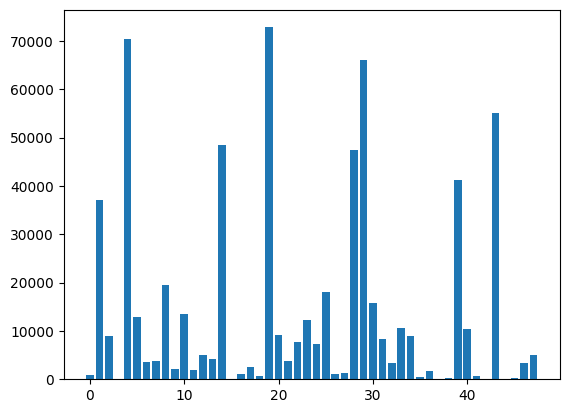

In [16]:
import matplotlib.pyplot as plt
plt.bar(x = list(i for i in range(len(balance))), height = balance)

Наблюдается сильный дизбаланс классов. Отберем только те, записей для которых больше 20000. 

In [17]:
cnt = 0
targets = dict()
j = 0
for i, elem in enumerate(balance):
    if elem > 0:
        targets[cols[i]] = j
        j+= 1
        print(cols[i])
        cnt += 1
cnt 

NYT Now
N.Y. / Region
Science
International Home
Opinion
Technology
Style
Your Money
Books
Watching
Food
Education
Times Insider
Health
Sports
Open
Job Market
Multimedia/Photos
Multimedia
U.S.
Briefing
Corrections
Well
Real Estate
The Upshot
Movies
Public Editor
Automobiles
Business Day
World
T Magazine
Travel
Today’s Paper
Theater
Magazine
Obituaries
Podcasts
Afternoon Update
Giving
Fashion & Style
The Learning Network
Universal
Homepage
Arts
Admin
Sunday Review
Blogs
Crosswords & Games


48

In [18]:
dataset = df[df['Section Name'].isin(targets)]
dataset

,Section Name,Headline
0,Style,In Watches: Minutes of Steel
1,Opinion,Americans and Their Flag
2,N.Y. / Region,Mugged With a Blow Dryer
3,Sports,Pop Warner Concussions Suit
4,Movies,"This Week’s Movies | Sept. 02, 2016"
...,...,...
649881,Movies,Lin-Manuel Miranda: ‘Savor Nights Like This’
649882,N.Y. / Region,"After a Devastating Fire, ‘the Black Lumberjac..."
649883,Sports,"For Mets’ Infield, Chiropractor May Be the Mos..."
649884,Movies,On the Red Carpet With ‘Hidden Figures’ Producers


In [19]:
def name_to_ind(name):
    return targets[name]
    
dataset['target'] = dataset['Section Name'].apply(name_to_ind)
dataset

,Section Name,Headline,target
0,Style,In Watches: Minutes of Steel,6
1,Opinion,Americans and Their Flag,4
2,N.Y. / Region,Mugged With a Blow Dryer,1
3,Sports,Pop Warner Concussions Suit,14
4,Movies,"This Week’s Movies | Sept. 02, 2016",25
...,...,...,...
649881,Movies,Lin-Manuel Miranda: ‘Savor Nights Like This’,25
649882,N.Y. / Region,"After a Devastating Fire, ‘the Black Lumberjac...",1
649883,Sports,"For Mets’ Infield, Chiropractor May Be the Mos...",14
649884,Movies,On the Red Carpet With ‘Hidden Figures’ Producers,25


Итого мы разделили рейтинг на 2 класса: хорошие отзывы (1) и плохие (0). Подготовим наш текст для обучения модели. 

In [20]:
import re
from collections import Counter
from nltk.stem.porter import *

stemmer = PorterStemmer()

def preprocess_text(text):
    return re.sub(r"[^\w\s]+", '', text).lower().split()

def preprocess_sentence_eng(text):
    return ' '.join(map(stemmer.stem, preprocess_text(text)))

In [21]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [22]:
dataset['preprocessed'] = dataset['Headline'].apply(preprocess_sentence_eng)
dataset.head()

,Section Name,Headline,target,preprocessed
0,Style,In Watches: Minutes of Steel,6,in watch minut of steel
1,Opinion,Americans and Their Flag,4,american and their flag
2,N.Y. / Region,Mugged With a Blow Dryer,1,mug with a blow dryer
3,Sports,Pop Warner Concussions Suit,14,pop warner concuss suit
4,Movies,"This Week’s Movies | Sept. 02, 2016",25,thi week movi sept 02 2016


In [23]:
train, test = train_test_split(dataset, test_size = 0.2, random_state = 42)

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator

In [25]:
class BasePreprocessor(BaseEstimator):
    """
    Класс для базовой обработки текста - нижний регистр и пунктуация
    """
    def fit(self, x, y=None):
        return self
    
    def transform(self, x):
        return np.array(list(map(lambda x: ' '.join(preprocess_text(x)), x)))

In [26]:
class StemmerEng(BaseEstimator):
    """
    Класс для стемминга на английском языке - разбиваем по словам и применяем к каждому стеммер
    """
    def __init__(self):
        self.stemmer = PorterStemmer()
        
    def fit(self, x, y=None):
        return self
    
    def _stem(self, word):
        return self.stemmer.stem(word)
    
    def _transform_text(self, text):
        return ' '.join(map(self._stem, text.split())) 

    def transform(self, x):
        return list(map(self._transform_text, x))

In [27]:
# На вход подаем необработанный текст
x_train = train['preprocessed']
x_test = test['preprocessed']
y_train = train['target']
y_test = test['target']

In [28]:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score

In [29]:
fit_results = []



# Перебираем модели и векторизацию
for vect in [CountVectorizer(), TfidfVectorizer()]:
    for model in [LogisticRegression(n_jobs = -1, verbose = 2), CatBoostClassifier(verbose = 2, max_depth = 9, learning_rate = 0.5, iterations = 200)]:
        print(vect, model)
        pipeline = Pipeline(
            [
                ("base", BasePreprocessor()), # препроцессинг тоже можно подбирать
                ("stem", StemmerEng()), # как и стемминг/лемматизацию
                ("vect", vect),
                ("model", model),
            ]
        )
        pipeline.fit(x_train, y_train)
        y_pred = pipeline.predict(x_test)
        metric = f1_score(y_pred, y_test, average = 'macro')
        fit_results.append(
            {
                'vect': vect.__class__.__name__,
                'model': model.__class__.__name__,
                'f1': metric,
            }
        )

fit_results = pd.DataFrame(fit_results)

CountVectorizer() LogisticRegression(n_jobs=-1, verbose=2)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


CountVectorizer() <catboost.core.CatBoostClassifier object at 0x000001CDBC901090>
0:	learn: 3.2327160	total: 12.3s	remaining: 40m 50s
2:	learn: 36.9871036	total: 36.2s	remaining: 39m 40s
4:	learn: 89.1461809	total: 1m 1s	remaining: 40m 2s
6:	learn: 88.9102599	total: 1m 28s	remaining: 40m 28s
8:	learn: 95.0048229	total: 1m 54s	remaining: 40m 39s
10:	learn: 63.0173434	total: 2m 20s	remaining: 40m 10s
12:	learn: 59.9755550	total: 2m 46s	remaining: 39m 53s
14:	learn: 61.3889170	total: 3m 14s	remaining: 39m 54s
16:	learn: 45.0084270	total: 3m 40s	remaining: 39m 37s
18:	learn: 92.1590491	total: 4m 7s	remaining: 39m 21s
20:	learn: 65.0902926	total: 4m 36s	remaining: 39m 17s
22:	learn: 67.3162942	total: 5m 3s	remaining: 38m 53s
24:	learn: 53.6627742	total: 5m 30s	remaining: 38m 31s
26:	learn: 48.1625690	total: 5m 56s	remaining: 38m 7s
28:	learn: 79.3608097	total: 6m 23s	remaining: 37m 41s
30:	learn: 53.7880778	total: 6m 50s	remaining: 37m 17s
32:	learn: 51.5388730	total: 7m 16s	remaining: 36m 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


TfidfVectorizer() <catboost.core.CatBoostClassifier object at 0x000001CDBC9025C0>
0:	learn: 3.3468471	total: 43.1s	remaining: 2h 22m 57s
2:	learn: 50.3763561	total: 2m 8s	remaining: 2h 20m 38s
4:	learn: 72.0677837	total: 3m 32s	remaining: 2h 18m 26s
6:	learn: 80.1701498	total: 4m 57s	remaining: 2h 16m 39s
8:	learn: 85.9893268	total: 6m 21s	remaining: 2h 14m 59s
10:	learn: 72.7897862	total: 7m 45s	remaining: 2h 13m 16s
12:	learn: 50.5079522	total: 9m 10s	remaining: 2h 11m 58s
14:	learn: 60.7442104	total: 10m 39s	remaining: 2h 11m 26s
16:	learn: 51.2042764	total: 12m 9s	remaining: 2h 10m 51s
18:	learn: 76.5330022	total: 13m 36s	remaining: 2h 9m 40s
20:	learn: 65.5424292	total: 15m 1s	remaining: 2h 8m 1s
22:	learn: 66.9657333	total: 16m 26s	remaining: 2h 6m 32s
24:	learn: 68.9787556	total: 17m 50s	remaining: 2h 4m 52s
26:	learn: 67.0293337	total: 19m 13s	remaining: 2h 3m 12s
28:	learn: 59.0239521	total: 20m 38s	remaining: 2h 1m 43s
30:	learn: 57.7766607	total: 22m 2s	remaining: 2h 12s
32:

In [30]:
fit_results.sort_values('f1', ascending=False) 

,vect,model,f1
0,CountVectorizer,LogisticRegression,0.924557
2,TfidfVectorizer,LogisticRegression,0.667262
1,CountVectorizer,CatBoostClassifier,0.211136
3,TfidfVectorizer,CatBoostClassifier,0.141456


In [31]:
from sklearn.neural_network import MLPClassifier
pipeline = Pipeline(
            [
                ("base", BasePreprocessor()), # препроцессинг тоже можно подбирать
                ("stem", StemmerEng()), # как и стемминг/лемматизацию
                ("vect", TfidfVectorizer()),
                ("model", MLPClassifier(verbose = True, max_iter = 6)),
            ]
        )
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)
f1_score(y_pred, y_test, average = 'macro')

Iteration 1, loss = 0.79235638
Iteration 2, loss = 0.08465826
Iteration 3, loss = 0.03533876
Iteration 4, loss = 0.02493470
Iteration 5, loss = 0.02180047
Iteration 6, loss = 0.02019460


C:\Users\ptarh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9381367489644193

In [33]:
import pickle
with open('mlp48.pkl', 'wb') as f:
        pickle.dump(pipeline, f)

## Выводы


MLP сработал лучше, чем остальные модели. CatBoost требует слишком много времени для сходимости, зато перцептрон сходится всего за 5-6 эпох. 